**Milestone 2 contd.**
---
*This Notebook utilizes the created python module*

**Task 3 contd.**

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions_anamica import *

from scripts import project_functions_anamica

In [2]:
df = project_functions_anamica.load_process_data('/Users/anamica/data301/course-project-group_6014/data/data_raw/part_data.csv')
df

,Gender,PlaceofBirth,GradeID,Topic,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class,TotalInteraction
0,M,KuwaIT,G-04,IT,15,16,2,20,Good,Under-7,M,53
1,M,KuwaIT,G-04,IT,20,20,3,25,Good,Under-7,M,68
2,M,KuwaIT,G-04,IT,10,7,0,30,Bad,Above-7,L,47
3,M,KuwaIT,G-04,IT,30,25,5,35,Bad,Above-7,L,95
4,M,KuwaIT,G-04,IT,40,50,12,50,Bad,Above-7,M,152
...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,G-08,Chemistry,5,4,5,8,Bad,Above-7,L,22
476,F,Jordan,G-08,Geology,50,77,14,28,Bad,Under-7,M,169
477,F,Jordan,G-08,Geology,55,74,25,29,Bad,Under-7,M,183
478,F,Jordan,G-08,History,30,17,14,57,Bad,Above-7,L,118


**Task 4 - EDA**
---

In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

**Dataset Exploration**

A quantitative representation of the numerical data within the dataset

Observations include:
- The Average Total Interaction is 182.77, with a minimum of 4 and a maximum of 368
- The Individual Interaction with the highest average is Discussion
- The Individual Interaction with the highest maximum is 100

In [17]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
RaisedHands,480.0,46.775000,30.779223,0.0,15.75,50.0,75.00,100.0
VisitedResources,480.0,54.797917,33.080007,0.0,20.00,65.0,84.00,99.0
AnnouncementsView,480.0,37.918750,26.611244,0.0,14.00,33.0,58.00,98.0
Discussion,480.0,43.283333,27.637735,1.0,20.00,39.0,70.00,99.0
TotalInteraction,480.0,182.775000,93.056583,4.0,104.00,184.0,257.25,368.0


A quantitative representation of the categorical data within the dataset

Observations include:
- The Majority of Participants within the dataset are male with a ratio of 305:175
- The Majority of Participants are from Kuwait
- The Majority of Parents are satisfied with the school

In [18]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Gender,480,2,M,305
PlaceofBirth,480,14,KuwaIT,180
GradeID,480,10,G-02,147
Topic,480,12,IT,95
ParentschoolSatisfaction,480,2,Good,292
StudentAbsenceDays,480,2,Under-7,289
Class,480,3,M,211


**Total Interaction vs Class Achievement**

A surface-level exploration into the relationship between class achievement and total interaction shows the students with the highest grades participated around 3.14 times as much as students with the lowest achievement

In [19]:
dataTotalInteraction = df.groupby('Class', as_index = False)['TotalInteraction'].mean()
dataTotalInteraction

,Class,TotalInteraction
0,H,256.077465
1,L,81.622047
2,M,194.327014


Text(0, 0.5, 'Class Achievement (H: high M: medium L: low)')

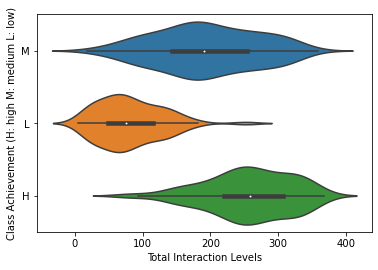

In [21]:
violinplot = sns.violinplot(data=df, x='TotalInteraction', y='Class',scale='width')
plt.xlabel("Total Interaction Levels")
plt.ylabel("Class Achievement (H: high M: medium L: low)")

In the following violin plot, an observer can clearly visualize that although the level of interaction with medium achieving students varied (yet it is relevant to note that there is a high concentration surrounding an interaction count of 200), students with low achievement had an overall low level of interaction, and high achievers had a high level of interaction
Although this conclusion may seem obvious, the quantitative data to support the hypothesis illustrates the validity of the statement. 

**Further Look into Total Interaction**

When delving deeper into the different methods of interacting within the classroom, the following pair plot reveals the positive correlation between multiple means of participation

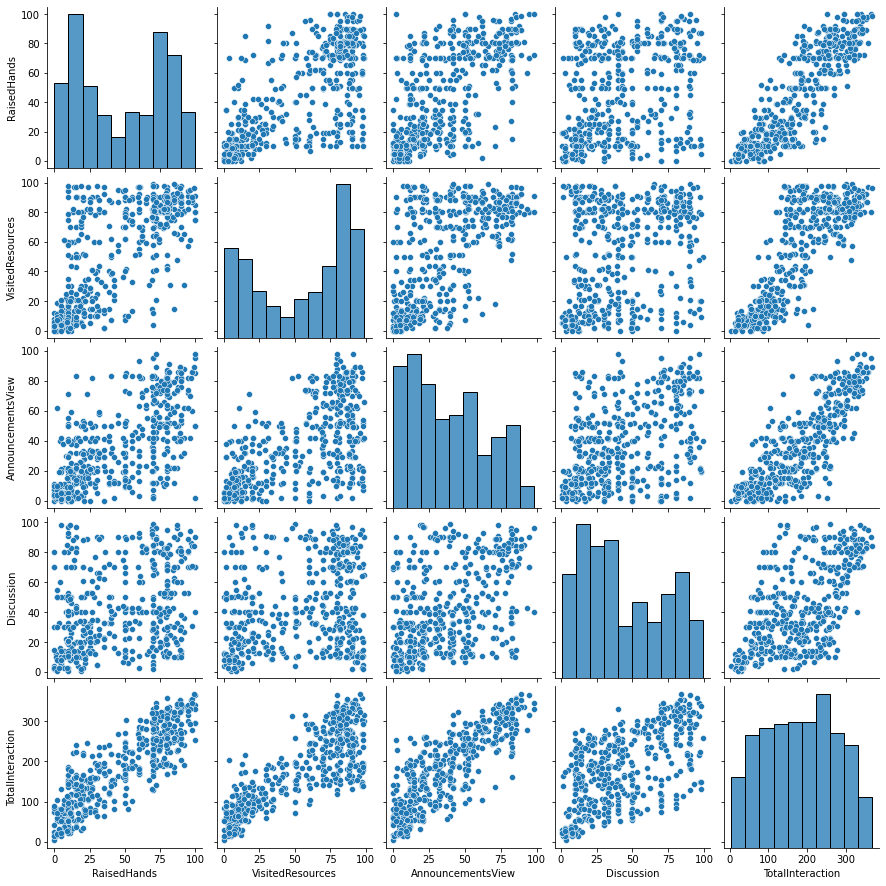

In [8]:
pairplot = sns.pairplot(df)

Many students who participated a lot one way, also showed activity within the other streams, and as discussed previously the combined total interaction is higher with higher achieving students

**Gender vs Total Interaction**

A inquiry into the relationship between gender and total interaction

Text(0, 0.5, 'Total Interaction Levels')

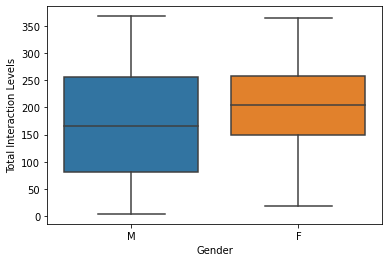

In [23]:
boxplot = sns.boxplot(x='Gender', y='TotalInteraction', data = df)
plt.ylabel("Total Interaction Levels")

Through the visualization of the barplot, it is clear that there is a big disparity within the amount of interaction between males and females. From our previous findings once can assume that females are higher achievers due to their increased overall participation. 
Although, it is important to note that this dataset has data from 1.74 times as many males as females, so that may be an influential factor to consider.

**Total Interaction vs Absences**

A comparison between total interaction and absences can reveal the relationship absences plays in achievement.
The following boxplot illustrates how students with fewer absences had higher levels of interaction, yielding to higher levels of achievement

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='Total Interaction Levels'>

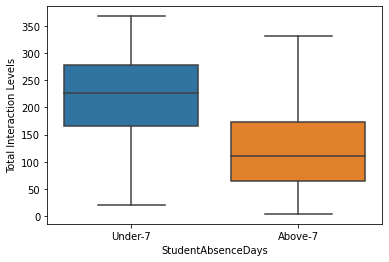

In [24]:
boxplot1 = sns.boxplot(data = df, y='TotalInteraction', x='StudentAbsenceDays')
plt.ylabel("Total Interaction Levels")
boxplot1

**Parents Satisfaction vs Total Interaction**

A comparison between parent's satisfaction with the school and the total amount of interaction of their children, to explore the effects of the parent's mindsets

In [11]:
dataPSS = df.groupby('ParentschoolSatisfaction', as_index = False)['TotalInteraction'].mean()
dataPSS

,ParentschoolSatisfaction,TotalInteraction
0,Bad,144.409574
1,Good,207.476027


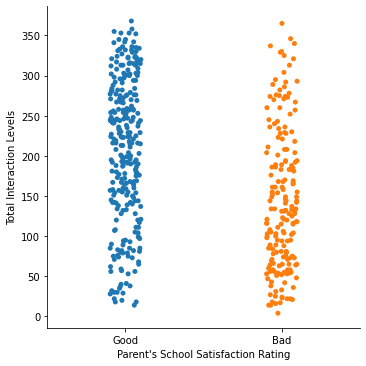

In [26]:
catplot = sns.catplot(data = df, y='TotalInteraction', x='ParentschoolSatisfaction')
plt.ylabel("Total Interaction Levels")
plt.xlabel("Parent's School Satisfaction Rating")
catplot

From the catplot, as well as the data given above, it is evident that parent's whose students had a higher participation, had a higher satisfaction rate with the school
Within the catplot, there is a greater concentration within the good variable at the high end of total interactions vs within the bad variable where there is a greather concentration at the low end of total interactions